In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
solargenGB = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.endswith('GB_GBN_solar_generation_actual')),
                        parse_dates=[0], index_col=0)

solargenSE = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.endswith('SE_solar_generation_actual')),
                        parse_dates=[0], index_col=0)

solargenDE = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.endswith('DE_solar_generation_actual')),
                        parse_dates=[0], index_col=0)

solargenDK = pd.read_csv("data/time_series_60min_singleindex.csv",
                        usecols=(lambda s: s.startswith('utc') | 
                                 s.endswith('DK_solar_generation_actual')),
                        parse_dates=[0], index_col=0)

In [3]:
solardataDK = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.endswith("DK_radiation_direct_horizontal") | 
                         s.endswith("DK_radiation_diffuse_horizontal")),
                parse_dates=[0], index_col=0)

solardataDE = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.endswith("DE_radiation_direct_horizontal") | 
                         s.endswith("DE_radiation_diffuse_horizontal")),
                parse_dates=[0], index_col=0)

solardataGB = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.endswith("GB_radiation_direct_horizontal") | 
                         s.endswith("GB_radiation_diffuse_horizontal")),
                parse_dates=[0], index_col=0)

solardataSE = pd.read_csv("data/weather_data.csv",
                usecols=(lambda s: s.startswith('utc') | 
                         s.endswith("SE_radiation_direct_horizontal") | 
                         s.endswith("SE_radiation_diffuse_horizontal")),
                parse_dates=[0], index_col=0)

In [4]:
start_remove = pd.to_datetime('2016-01-01')
end_remove = pd.to_datetime('2017-01-01')

start_test = pd.to_datetime('2015-01-01')
end_test = pd.to_datetime('2016-01-01')

In [5]:
# start_remove = pd.to_datetime('2016-01-01', utc = True)
# end_remove = pd.to_datetime('2017-01-01', utc = True)

# start_test = pd.to_datetime('2015-01-01', utc = True)
# end_test = pd.to_datetime('2016-01-01', utc = True)

In [6]:
solardatatrainGB = solardataGB.loc[(solardataGB.index >= start_remove) & (solardataGB.index < end_remove)]
solargentrainGB = solargenGB.loc[(solargenGB.index >= start_remove) & (solargenGB.index < end_remove)]

solardatatestGB = solardataGB.loc[(solardataGB.index >= start_test) & (solardataGB.index < end_test)]
solargentestGB = solargenGB.loc[(solargenGB.index >= start_test) & (solargenGB.index < end_test)]

In [7]:
solardatatrainDE = solardataDE.loc[(solardataDE.index >= start_remove) & (solardataDE.index < end_remove)]
solargentrainDE = solargenDE.loc[(solargenDE.index >= start_remove) & (solargenDE.index < end_remove)]

solardatatestDE = solardataDE.loc[(solardataDE.index >= start_test) & (solardataDE.index < end_test)]
solargentestDE = solargenDE.loc[(solargenDE.index >= start_test) & (solargenDE.index < end_test)]

In [8]:
solardatatrainDK = solardataDK.loc[(solardataDK.index >= start_remove) & (solardataDK.index < end_remove)]
solargentrainDK = solargenDK.loc[(solargenDK.index >= start_remove) & (solargenDK.index < end_remove)]

solardatatestDK = solardataDK.loc[(solardataDK.index >= start_test) & (solardataDK.index < end_test)]
solargentestDK = solargenDK.loc[(solargenDK.index >= start_test) & (solargenDK.index < end_test)]

In [9]:
solardatatrainSE = solardataSE.loc[(solardataSE.index >= start_remove) & (solardataSE.index < end_remove)]
solargentrainSE = solargenSE.loc[(solargenSE.index >= start_remove) & (solargenSE.index < end_remove)]

solardatatestSE = solardataSE.loc[(solardataSE.index >= start_test) & (solardataSE.index < end_test)]
solargentestSE = solargenSE.loc[(solargenSE.index >= start_test) & (solargenSE.index < end_test)]

In [10]:
solardatatrainSE = solardatatrainSE.rename({"utc_timestamp": "timestamp", "SE_radiation_direct_horizontal": "radiation_direct_horizontal", "SE_radiation_diffuse_horizontal": "radiation_diffuse_horizontal"}, axis='columns')

In [11]:
solardatatrainDE = solardatatrainDE.rename({"utc_timestamp": "timestamp", "DE_radiation_direct_horizontal": "radiation_direct_horizontal", "DE_radiation_diffuse_horizontal": "radiation_diffuse_horizontal"}, axis='columns')

In [12]:
solardatatrainDK = solardatatrainDK.rename({"utc_timestamp": "timestamp", "DK_radiation_direct_horizontal": "radiation_direct_horizontal", "DK_radiation_diffuse_horizontal": "radiation_diffuse_horizontal"}, axis='columns')

In [13]:
solardatatrainGB = solardatatrainGB.rename({"utc_timestamp": "timestamp", "GB_radiation_direct_horizontal": "radiation_direct_horizontal", "GB_radiation_diffuse_horizontal": "radiation_diffuse_horizontal"}, axis='columns')

In [14]:
solardataformatted = pd.concat([solardatatrainSE, solardatatrainDK, solardatatrainDE], sort=False)

In [15]:
solargentrainSE = solargentrainSE.rename({"utc_timestamp": "timestamp", "SE_solar_generation_actual": "solar_generation"}, axis='columns')

In [16]:
solargentrainDE = solargentrainDE.rename({"utc_timestamp": "timestamp", "DE_solar_generation_actual": "solar_generation"}, axis='columns')

In [17]:
solargentrainDK = solargentrainDK.rename({"utc_timestamp": "timestamp", "DK_solar_generation_actual": "solar_generation"}, axis='columns')

In [18]:
solargentrainGB = solargentrainGB.rename({"utc_timestamp": "timestamp", "GB_GBN_solar_generation_actual": "solar_generation"}, axis='columns')

In [19]:
solargendataformatted = pd.concat([solargentrainSE, solargentrainDK, solargentrainDE], sort=False)

In [20]:
solargendataformatted = solargendataformatted * 1e-3

In [21]:
solargentestDE = solargentestDE * 1e-3

In [22]:
solargentestGB = solargentestGB * 1e-3

In [23]:
solargentrainSE =solargentrainSE * 1e-3

In [24]:
solargentrainDK =solargentrainDK * 1e-3

In [25]:
solargentrainGB =solargentrainGB * 1e-3

In [26]:
solargentrainDE = solargentrainDE * 1e-3

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [28]:
def energy_production(energy):
    total_energy = np.sum(energy)
    avg_energy_per_hour = total_energy / energy.shape[0]
    avg_energy_per_day = total_energy / (energy.shape[0] / 24)
    print("Energy Data measured in Giga Watts")
    print("Total energy:", total_energy)
    print("Average Energy Per Hour:", avg_energy_per_hour)
    print("Average Energy Per Day:", avg_energy_per_day)

In [29]:
model = LinearRegression().fit(solardataformatted,solargendataformatted)

In [30]:
#using the previously formatted data which is data from 2015
prediction = model.predict(solardatatestGB)

In [31]:
timeseries = pd.date_range('2015-01-01', '2015-12-31 23:00:00', freq='H')

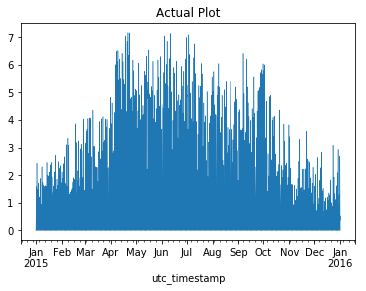

In [70]:
solargentestGB.plot(linewidth=0.5, title='Actual Plot', legend=False)

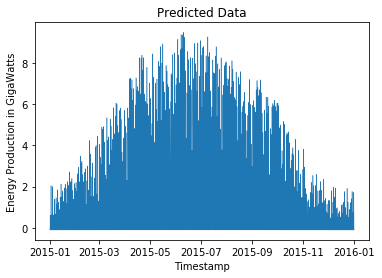

In [64]:
plt.plot(timeseries,prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [34]:
print(r2_score(solargentestGB, prediction))

0.6676279816718153


In [35]:
print(mean_squared_error(solargentestGB, prediction))

0.8108515937911096


In [36]:
energy_production(solargentestGB)

Energy Data measured in Giga Watts
Total energy: GB_GBN_solar_generation_actual    11110.58
dtype: float64
Average Energy Per Hour: GB_GBN_solar_generation_actual    1.268331
dtype: float64
Average Energy Per Day: GB_GBN_solar_generation_actual    30.439945
dtype: float64


In [37]:
energy_production(prediction)

Energy Data measured in Giga Watts
Total energy: 12244.091538190156
Average Energy Per Hour: 1.3977273445422553
Average Energy Per Day: 33.545456269014124


In [38]:
# Train with SE, test with GB

In [39]:
SE_model = LinearRegression().fit(solardatatrainSE,solargentrainSE)

In [40]:
SE_prediction = SE_model.predict(solardatatestGB)

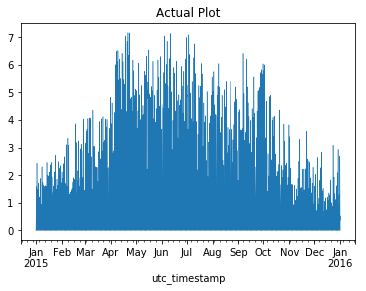

In [71]:
solargentestGB.plot(linewidth=0.5, title='Actual Plot', legend=False)

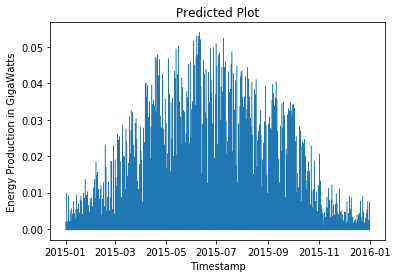

In [72]:
plt.plot(timeseries,SE_prediction, linewidth=0.5)
plt.xlabel('Timestamp')
plt.ylabel('Energy Production in GigaWatts')
plt.title('Predicted Plot')
plt.show()

In [43]:
print(r2_score(solargentestGB, SE_prediction))

-0.6388752107710496


In [44]:
print(mean_squared_error(solargentestGB, SE_prediction))

3.998184273642143


In [73]:
energy_production(solargentestGB)

Energy Data measured in Giga Watts
Total energy: GB_GBN_solar_generation_actual    11110.58
dtype: float64
Average Energy Per Hour: GB_GBN_solar_generation_actual    1.268331
dtype: float64
Average Energy Per Day: GB_GBN_solar_generation_actual    30.439945
dtype: float64


In [45]:
energy_production(SE_prediction)

Energy Data measured in Giga Watts
Total energy: 58.00513522201792
Average Energy Per Hour: 0.006621590778769169
Average Energy Per Day: 0.15891817869046004


In [46]:
# train with DK, test with GB

In [47]:
DK_model = LinearRegression().fit(solardatatrainDK,solargentrainDK)

In [48]:
DK_prediction = DK_model.predict(solardatatestGB)

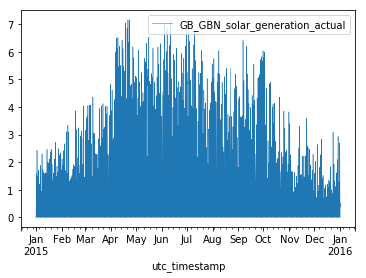

In [49]:
solargentestGB.plot(linewidth=0.5)

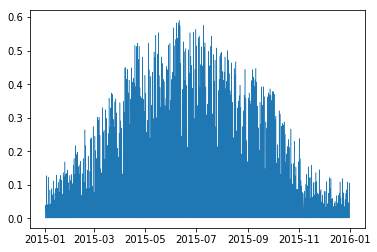

In [50]:
plt.plot(timeseries,DK_prediction, linewidth=0.5)

In [51]:
print(r2_score(solargentestGB, DK_prediction))

-0.4132827010800837


In [52]:
print(mean_squared_error(solargentestGB, DK_prediction))

3.4478309468177453


In [53]:
energy_production(DK_prediction)

Energy Data measured in Giga Watts
Total energy: 781.020955987097
Average Energy Per Hour: 0.08915764337752248
Average Energy Per Day: 2.1397834410605396


In [54]:
# train with DE, test with GB

In [55]:
DE_model = LinearRegression().fit(solardatatrainDE,solargentrainDE)

In [56]:
DE_prediction = DE_model.predict(solardatatestGB)

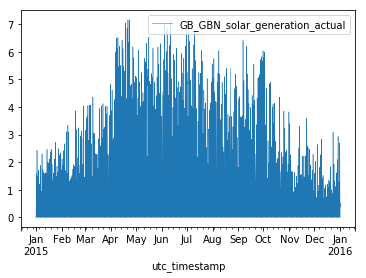

In [57]:
solargentestGB.plot(linewidth=0.5)

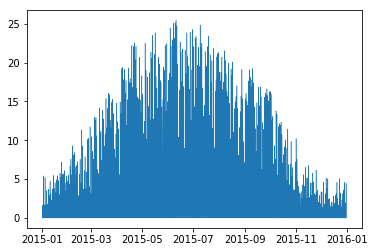

In [58]:
plt.plot(timeseries,DE_prediction, linewidth=0.5)

In [59]:
print(r2_score(solargentestGB, DE_prediction))

-9.113910304831457


In [60]:
print(mean_squared_error(solargentestGB, DE_prediction))

24.67379874931394


In [61]:
energy_production(DE_prediction)

Energy Data measured in Giga Watts
Total energy: 32886.87688519045
Average Energy Per Hour: 3.754209690090234
Average Energy Per Day: 90.10103256216563
